In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Define Sigmoid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


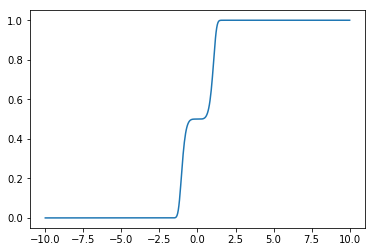

In [13]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n * n * n * n * n))

xx = np.linspace(start=-10.0, stop=10.0, num=500)
yy = sigmoid(xx)

plt.plot(xx, yy)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


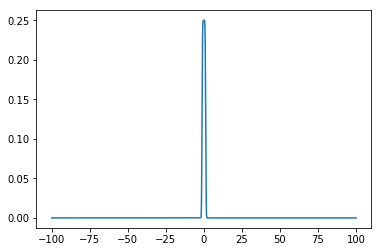

In [10]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-100.0, stop=100.0, num=50000)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

In [5]:
class Multiply:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return self.x * self.y
    
    def backward(self):
        return [self.y, self.x]

multiply = Multiply()
print(multiply.forward(2, 3))
print(multiply.backward())

6
[3, 2]


In [6]:
class Exp:
    def forward(self, x):
        self.x = x
        return np.exp(self.x)
    
    def backward(self):
        return np.exp(self.x)

exp = Exp()
print(exp.forward(0))
print(exp.backward())

1.0
1.0


In [7]:
class Add:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return self.x + self.y
    
    def backward(self):
        return [1, 1]

add = Add()
print(add.forward(2, 3))
print(add.backward())

5
[1, 1]


In [10]:
class Flip:
    def forward(self, x):
        self.x = x
        return 1 / self.x
    
    def backward(self):
        return -1.0 * (1 / self.x ** 2)
    
flip = Flip()
print(flip.forward(2))
print(flip.backward())

0.5
-0.25


In [35]:
multiply = Multiply()
exp = Exp()
add = Add()
flip = Flip()

x = 0
forward1 = multiply.forward(-1.0, x)
forward2 = exp.forward(forward1)
forward3 = add.forward(forward2, 1.0)
forward4 = flip.forward(forward3)

print("{0} => {1}".format(forward4 == sigmoid(x), forward4))

True => 0.5


In [36]:
backward1 = flip.backward()
backward2 = backward1 * add.backward()[0]
backward3 = backward2 * exp.backward()
backward4 = backward3 * multiply.backward()[1]

print("{0} => {1}".format(backward4 == sigmoid_derivative(x), backward4))

True => 0.25
